In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def mode_1(velocity, space_gap, rel_vel = 0):
    alpha = 0.8 # 0.7 original
    tau = 2.4 # 2.6 original
    s_min = 5
    k = 1.5
    
    rel_vel_term = 0
    
    # rel_vel_term = k * rel_vel
    
    return alpha * (space_gap - s_min - tau * velocity) + rel_vel_term

In [3]:
def mode_3(velocity, space_gap, rel_vel = 0):
    alpha = 1.0 # 1.1 original
    tau = 2.4 # 2.2 original
    s_min = 5
    k = 0.5
    
    rel_vel_term = 0
    
    # rel_vel_term = k * rel_vel
    
    return alpha * (space_gap - s_min - tau * velocity) + rel_vel_term

In [4]:
vel_range = np.arange(0.0, 35.0, 0.5)
space_gap_range = np.arange(0.0, 75.0, 0.5)

V, G = np.meshgrid(vel_range, space_gap_range)

In [5]:
def color_function(v, g):
    return mode_1(v, g) - mode_3(v, g)

In [6]:
C = color_function(V, G)

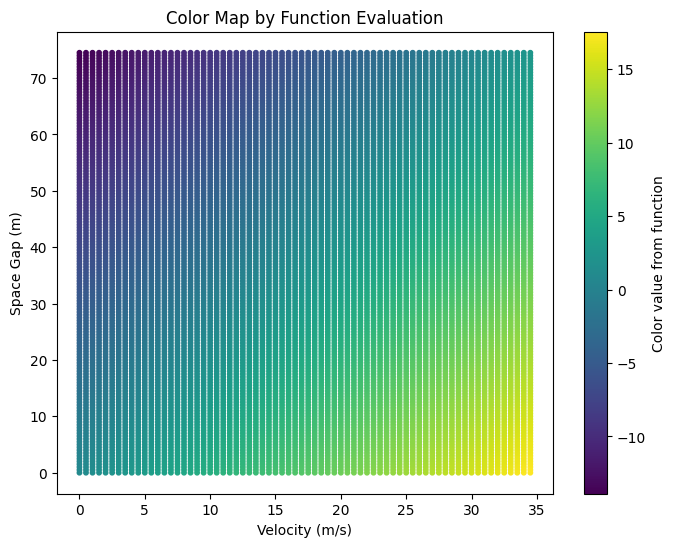

In [7]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(V, G, c=C, cmap='viridis', s=10)
plt.colorbar(scatter, label='Color value from function')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Space Gap (m)')
plt.title('Color Map by Function Evaluation')
plt.show()

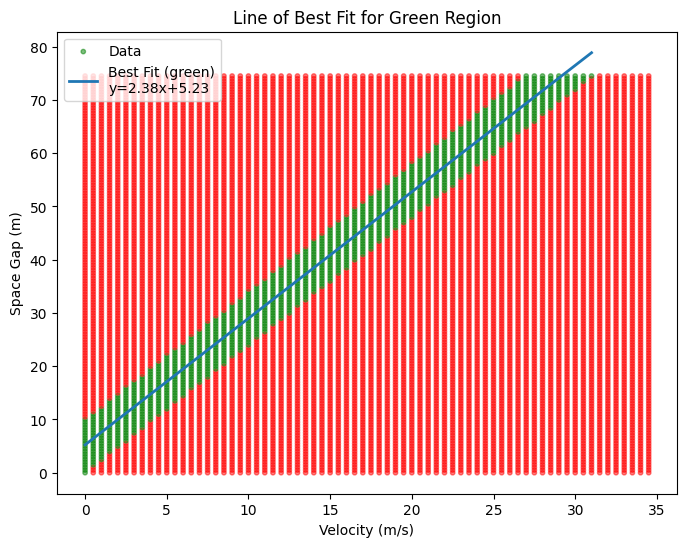

In [8]:
# Create a color mask
colors = np.where(np.abs(C) > 1, 'red', 'green')

# Flatten for plotting
V_flat = V.flatten()
G_flat = G.flatten()
colors_flat = colors.flatten()

# ---- Filter ONLY green section ----
green_mask = colors_flat == 'green'
V_green = V_flat[green_mask]
G_green = G_flat[green_mask]

# ---- Line of best fit (linear regression) ----
coeffs = np.polyfit(V_green, G_green, 1)  # 1 = linear fit
m, b = coeffs
fit_line = m * V_green + b

# ---- Plot ----
plt.figure(figsize=(8,6))
plt.scatter(V_flat, G_flat, c=colors_flat, s=10, alpha=0.5, label='Data')
plt.plot(V_green, fit_line, linewidth=2, label=f'Best Fit (green)\ny={m:.2f}x+{b:.2f}')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Space Gap (m)')
plt.title('Line of Best Fit for Green Region')
plt.legend()
plt.show()
